In [221]:
# 读取文件、拆分数据、按列打包、去掉表头、转换为数字、分别存储在对应的列表中
import csv

with open('diabetes.tsv','r') as tsvfile:

    reader=csv.reader(tsvfile, delimiter='\t')
    data=list(zip(*reader))

    index=0
    for i in data:
        newline=[]
        for j in i[1:]:                      
            v=float(j)
            newline.append(v)
        data[index]=newline
        index+=1

    age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y=data

In [222]:
# 任务1：计算所有值的平均值和方差
import numpy as np
import pandas as pd

ms,vs=[],[]
for i in data:
    ms.append(np.mean(i))
    vs.append(np.var(i))

names={0:'age',1:'sex',2:'bmi',3:'bp',4:'s1',5:'s2',6:'s3',7:'s4',8:'s5',9:'s6',10:'y'}

jz_fc={'平均值':ms,'方差':vs}
jf=pd.DataFrame(jz_fc)
jf=jf.rename(names)
print(jf)

            平均值           方差
age   48.518100   171.457817
sex    1.468326     0.248997
bmi   26.375792    19.475636
bp    94.647014   190.871586
s1   189.140271  1195.007473
s2   115.439140   922.862835
s3    49.788462   166.915093
s4     4.070249     1.661493
s5     4.641411     0.272274
s6    91.260181   131.866695
y    152.133484  5929.884897


In [223]:
# 按性别分离BMI、BP和Y
bmi1,bmi2,bp1,bp2,y1,y2=[],[],[],[],[],[]
index1=0
for i in sex:
    if(i==1):
        bmi1.append(bmi[index1])
        bp1.append(bp[index1])
        y1.append(y[index1])
    else:
        bmi2.append(bmi[index1])
        bp2.append(bp[index1])
        y2.append(y[index1])
    index1+=1

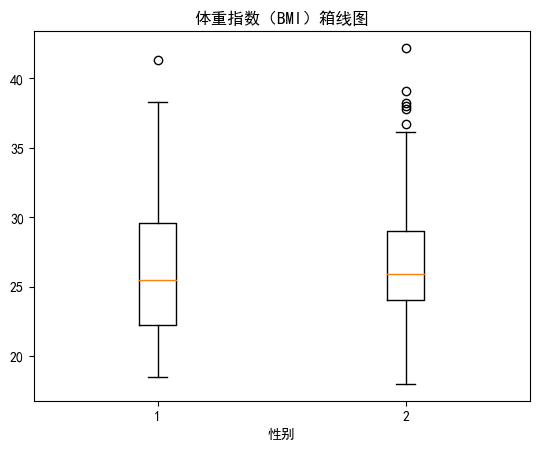

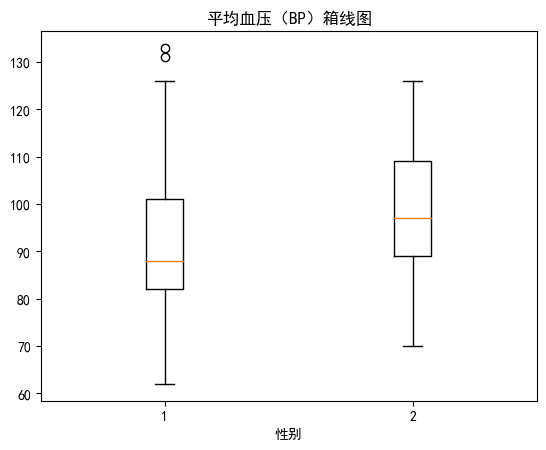

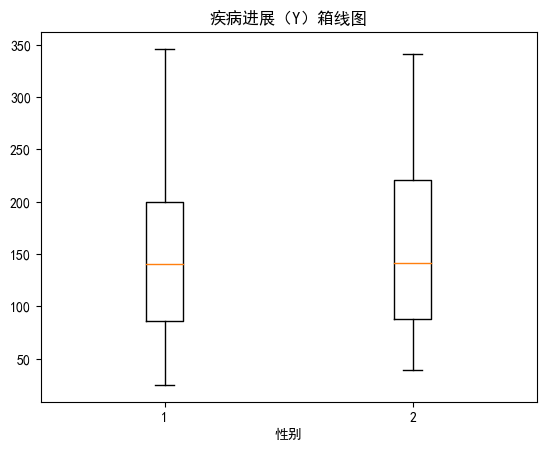

In [224]:
# 任务2：根据性别绘制BMI、BP和Y的箱线图
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']

def box(name,list1,list2):
    plt.boxplot([list1,list2])
    plt.title(name+'箱线图')
    plt.xlabel('性别')
    plt.show()

box('体重指数（BMI）',bmi1,bmi2)
box('平均血压（BP）',bp1,bp2)
box('疾病进展（Y）',y1,y2)

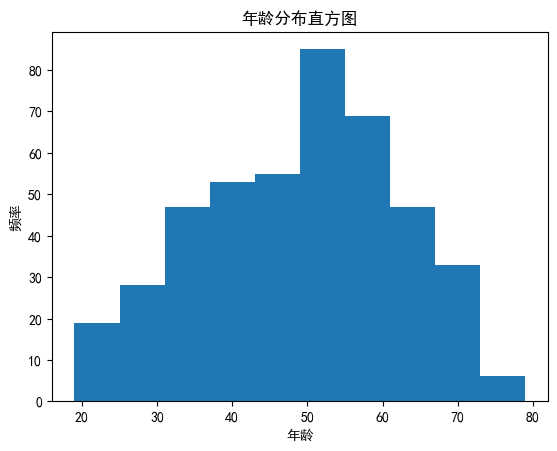

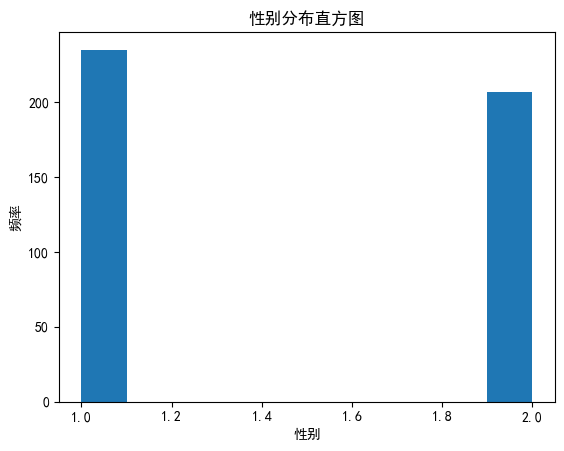

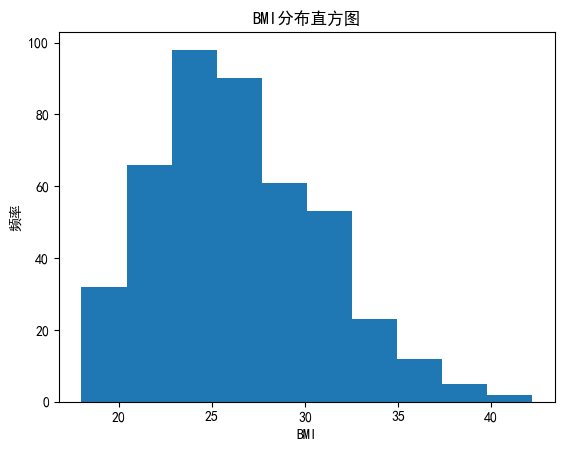

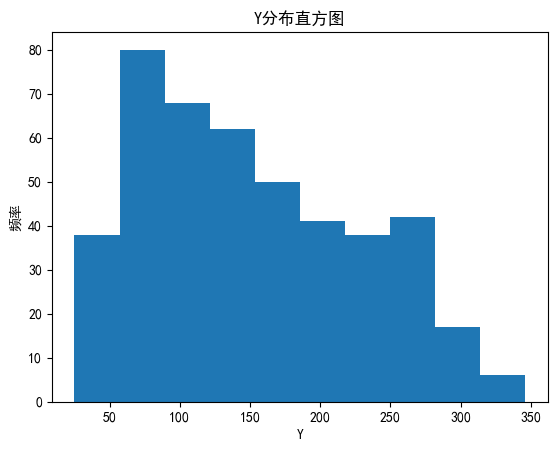

In [225]:
# 任务3：年龄、性别、BMI和Y变量的分布情况如何？

def histo(name,list1):
    plt.hist(list1)
    plt.title(name+"分布直方图")
    plt.xlabel(name)
    plt.ylabel('频率')
    plt.show()

histo('年龄',age)
histo('性别',sex)
histo('BMI',bmi)
histo('Y',y)

# 由图可见：年龄-正态分布、性别-均匀分布、BMI和Y分布的特征不明显

In [226]:
# 任务4：检验不同变量与疾病进展（Y）之间的相关性

cors=[]
for i in data:
    cor_m=np.corrcoef(i,y)
    cor=cor_m[0,1]
    cors.append(cor)

xg={'与疾病进展（y）相关系数':cors}
xgxs=pd.DataFrame(xg)
xgxs=xgxs.rename(names)
print(xgxs)

     与疾病进展（y）相关系数
age      0.187889
sex      0.043062
bmi      0.586450
bp       0.441482
s1       0.212022
s2       0.174054
s3      -0.394789
s4       0.430453
s5       0.565883
s6       0.382483
y        1.000000


In [227]:
# 任务5：检验男性和女性糖尿病进展程度不同的假设
from scipy import stats
stats.ttest_ind(y1,y2,equal_var=False)
# 此时pvalue=0.3674449793083975，大于0.05，两个样本无显著差异，拒绝男性女性糖尿病进展程度不同的假设

Ttest_indResult(statistic=-0.9022224453390377, pvalue=0.3674449793083975)